# Project question : Can we predict if a player’s age and number of played hours is correlated with whether they have a subscription?

Introduction

Background: In today’s world, online video games like Minecraft are becoming increasingly popular. Understanding how many individuals are subscribed to a gaming system can help companies boost user engagement and increase revenue. Identifying the factors that influence whether a player is subscribed is very useful for game developers, as it allows them to attract players more effectively.

Question: Can we predict if a player’s age and number of played hours is correlated with whether they have a subscription?

Dataset Description: To answer this question, I used the players.csv dataset, which contained all the variables needed for my analysis: players’ age, number of played hours, and their subscription status. The dataset includes 196 rows and 7 columns. The only modification I made was converting the subscribe column into a factor, since it was the response variable in my classification model and needed to be treated as a categorical variable.

In [1]:
#run this first
library(tidyverse)
library(tidymodels)
library(readr)  
library(dplyr) 
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


step : Loaded the players.csv file into R and named it players

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


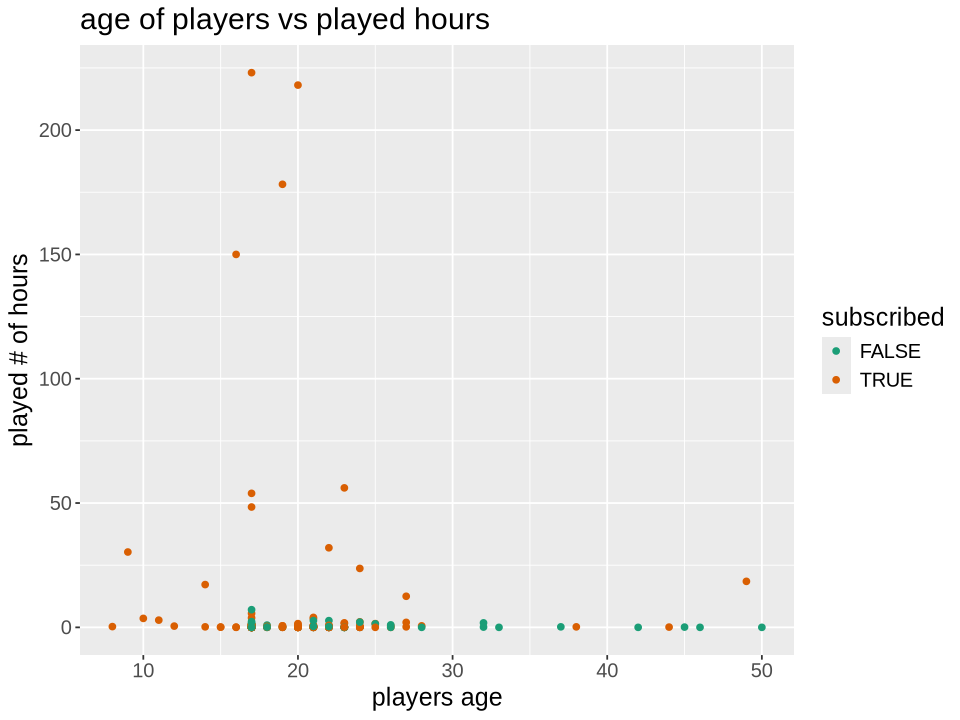

In [3]:
players_plot <- players |>
ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point() +
    scale_color_brewer(palette = "Dark2") +
    labs(title = 'age of players vs played hours', x = 'players age', y = 'played # of hours', colour = 'subscribed') + 
    theme(text = element_text(size = 15))
options(repr.plot.height = 6, repr.plot.width = 8)
 players_plot      

step = created a scatterplot graph to show the relationship between players' age and the number of hours played for each player, and added the subscription as colour to categorize which of those players were subscribed or not. based on this graph we see that,

In [4]:
players <- players |>
  mutate(subscribe = as.factor(subscribe))
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


changed the subscribe catergory to a factor from a lgl because,

In [14]:
set.seed(333)

data_split <- initial_split(players, prop= 0.75, strata = subscribe)
players_training <- training(data_split)
players_testing <- testing(data_split)
players_training 
players_testing

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22
Amateur,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17
Veteran,FALSE,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23
Veteran,FALSE,951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd,0.1,Vivienne,Male,18
Beginner,FALSE,fa7d496b2f74c51ec70395bd8397b49f97a3ce8d7ba7e08887d82ec0008137a7,0.0,Umar,Male,24
Regular,FALSE,453774822d52d6891593948224570a750c4334616ff8aa74cd61fad9d4855752,0.0,Edmund,Prefer not to say,23
Amateur,FALSE,5c27e8b9fed2816b006dc8397ec04470b59339fd591a46a3eb7951b939b72984,0.9,Pablo,Male,18
Veteran,FALSE,70db3a16ef58cf8bf6d8658c426ba4a5fcd7523a0abdd413f14466c41181215d,0.1,Lana,Male,22


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Beginner,TRUE,9db37a1d381697f6c83e3b97b276e38bb9d9c811ba4596edb75d4dbfea6415b0,0.0,Elodie,Female,17
Amateur,TRUE,ab1f44f93c3b828f55458971db393052d9711df3e0e7ff69540bfebfcec555ff,0.5,Marley,Male,17
Regular,TRUE,50cec73a632e4be7b155c3df5165de28b2c5baf092abcb7f509f5645776a56c2,0.0,Iman,Male,17
Amateur,TRUE,710148466b44cb02ba894aa9005a4892e619250ebd01153055d6c7578fc1ea10,0.1,Ayman,Male,23
Veteran,TRUE,f1b432523542f90c61176a555ccb2144468d76c91a32d74082ab8c101f9d25b6,0.1,London,Male,21


In [15]:
set.seed(333)
players_training <- players_training |>
drop_na()

players_testing <- players_testing |>
drop_na()

players_training
players_testing

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22
Amateur,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17
Veteran,FALSE,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23
Veteran,FALSE,951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd,0.1,Vivienne,Male,18
Beginner,FALSE,fa7d496b2f74c51ec70395bd8397b49f97a3ce8d7ba7e08887d82ec0008137a7,0.0,Umar,Male,24
Regular,FALSE,453774822d52d6891593948224570a750c4334616ff8aa74cd61fad9d4855752,0.0,Edmund,Prefer not to say,23
Amateur,FALSE,5c27e8b9fed2816b006dc8397ec04470b59339fd591a46a3eb7951b939b72984,0.9,Pablo,Male,18
Veteran,FALSE,70db3a16ef58cf8bf6d8658c426ba4a5fcd7523a0abdd413f14466c41181215d,0.1,Lana,Male,22


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Beginner,TRUE,9db37a1d381697f6c83e3b97b276e38bb9d9c811ba4596edb75d4dbfea6415b0,0.0,Elodie,Female,17
Amateur,TRUE,ab1f44f93c3b828f55458971db393052d9711df3e0e7ff69540bfebfcec555ff,0.5,Marley,Male,17
Regular,TRUE,50cec73a632e4be7b155c3df5165de28b2c5baf092abcb7f509f5645776a56c2,0.0,Iman,Male,17
Amateur,TRUE,710148466b44cb02ba894aa9005a4892e619250ebd01153055d6c7578fc1ea10,0.1,Ayman,Male,23
Veteran,TRUE,f1b432523542f90c61176a555ccb2144468d76c91a32d74082ab8c101f9d25b6,0.1,London,Male,21


In [16]:
set.seed(333)
players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)


#standerdize data
players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_training) |>  
step_scale(all_predictors()) |>  
step_center(all_predictors())

#train it
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
knn_spec

k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 2))

knn_results <- workflow() |>  
add_recipe(players_recipe) |>  
add_model(knn_spec) |>  
tune_grid(resamples = players_vfold, grid = k_vals) |> 
collect_metrics()

accuracies <- knn_results |>  
filter(.metric == "accuracy")
accuracies

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4883087,5,0.047100809,Preprocessor1_Model01
3,accuracy,binary,0.5771100,5,0.061889986,Preprocessor1_Model02
5,accuracy,binary,0.5559113,5,0.040675906,Preprocessor1_Model03
7,accuracy,binary,0.5706732,5,0.046766319,Preprocessor1_Model04
9,accuracy,binary,0.6596552,5,0.058201794,Preprocessor1_Model05
11,accuracy,binary,0.6782266,5,0.032364386,Preprocessor1_Model06
13,accuracy,binary,0.6991790,5,0.024977091,Preprocessor1_Model07
15,accuracy,binary,0.6791790,5,0.030075468,Preprocessor1_Model08
17,accuracy,binary,0.6996552,5,0.026138750,Preprocessor1_Model09


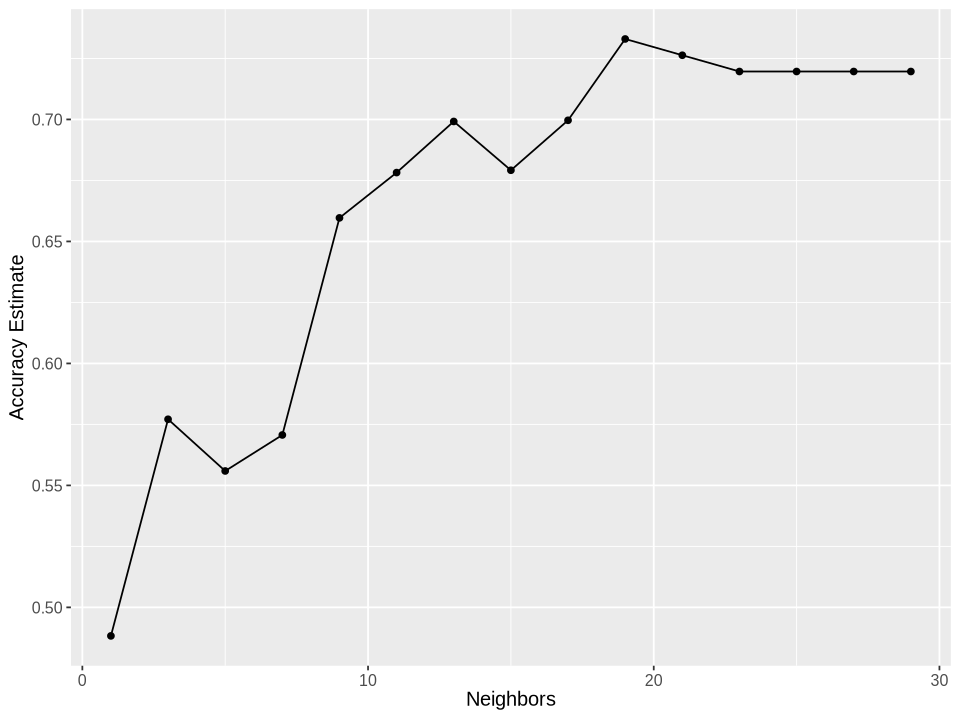

In [17]:
set.seed(333)
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +  
geom_point() +  
geom_line() +  
labs(x = "Neighbors", y = "Accuracy Estimate") +  
theme(text = element_text(size = 12))
options(repr.plot.height = 6, repr.plot.width = 8)
accuracy_vs_k

In [18]:
best_k <- accuracies |>        
arrange(desc(mean)) |>        
head(1) |>        
pull(neighbors)

best_k

[1] 19

In [19]:
players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_training) |>  
step_scale(all_predictors()) |>  
step_center(all_predictors())

knn_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |> 
set_engine("kknn") |> 
set_mode("classification")

knn_fit <- workflow() |>  
add_recipe(players_recipe) |>  
add_model(knn_spec2) |>  
fit(data = players_training)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(19,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2739726
Best kernel: rectangular
Best k: 19

In [11]:
players_predictions <- predict(knn_fit, players_testing) |>  
bind_cols(players_testing)

players_predictions |>  
metrics(truth = subscribe, estimate = .pred_class) |>  
filter(.metric == "accuracy")

players_predictions |> 
precision(truth = subscribe, estimate = .pred_class, event_level = "first")

players_predictions |> 
recall(truth = subscribe, estimate = .pred_class, event_level = "first")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7916667


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.2307692


In [12]:
confusion <- players_predictions |>             
conf_mat(truth = subscribe, estimate = .pred_class)
confusion

          Truth
Prediction FALSE TRUE
     FALSE     3    0
     TRUE     10   35

Prediction,Truth,n
<chr>,<chr>,<dbl>
FALSE,FALSE,3
TRUE,FALSE,10
FALSE,TRUE,0
TRUE,TRUE,35


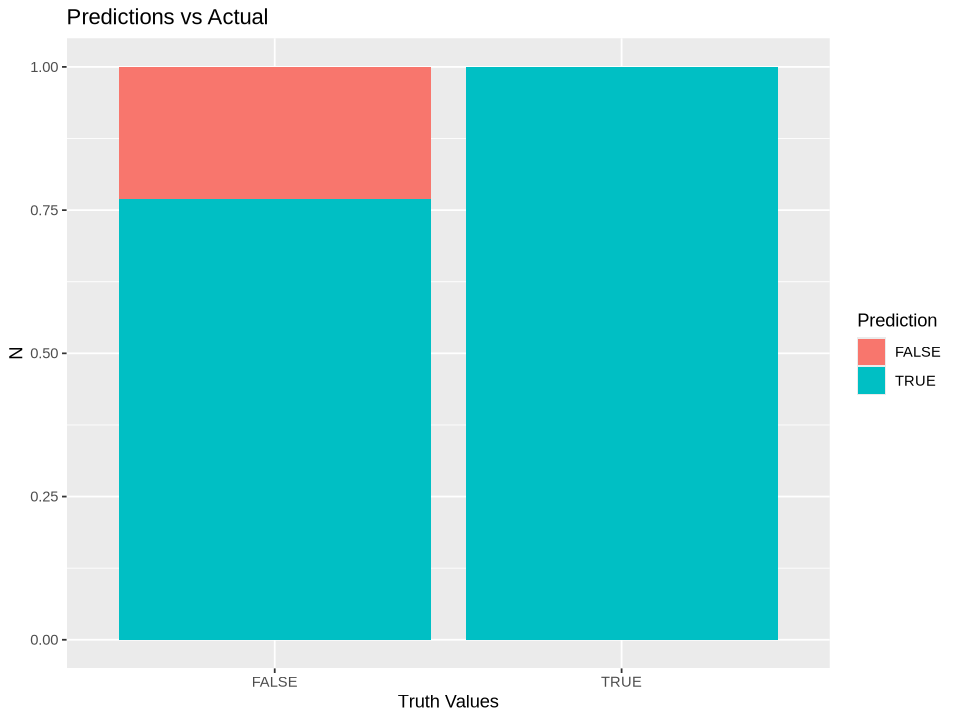

In [13]:
confusion_df <- as_tibble(confusion$table)
confusion_df

players_bar_plot <- confusion_df|>
    ggplot(aes(x = Truth, y = n, fill = Prediction )) + 
   geom_bar(stat = "identity", position = "fill") +
  xlab("Truth Values") +
  ylab("N") +
  labs(fill = "Prediction") +
  ggtitle("Predictions vs Actual")
players_bar_plot